# notes
- this notebook plots the correlation func of sigma, e1,e2 as function of separation
- same heights.
- pkl dir: heightPsfws, heightRand

In [141]:
import psfws
import pickle
import numpy as np
import treecorr
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
import treecorr
import pandas as pd
import galsim

def corr1d(thx,thy,para):
    cat = treecorr.Catalog(x=thx, y=thy, k=para, x_units='degree', y_units='degree')
    kk = treecorr.KKCorrelation(min_sep=0.001, max_sep=1, bin_type="Log",nbins=20, sep_units='degree')
    kk.process(cat)
    xi = kk.xi
    r = kk.rnom
    return xi, r

In [185]:
xi_sP = {}
xi_sR = {}
xi_e1P = {}
xi_e1R = {}
xi_e2P = {}
xi_e2R = {}

a={}

xi_medP={}
xi_medR={}

airmassP = {}
groundhP = {}
screensizeP = {}
maxspdP = {}
spdP={}

airmassR = {}
groundhR = {}
screensizeR = {}
maxspdR = {}
spdR={}

rsP =[]
rsR = []

for i in ([6, 7, 8, 9,10, 22, 23, 25, 26, 27]+list(range(30,41))):
    data = pickle.load(open("heightPsfws/outh_psfws_"+str(i)+".pkl", 'rb'))
    (thxP, thyP, seed, x, y, sigmaP, e1P, e2P, argumentsP, atmSummaryP, atmKwargsP) = tuple(data.values())
    
    xisP,xs = corr1d(thxP,thyP,sigmaP)
    xie1P,xs = corr1d(thxP,thyP,e1P)
    xie2P,xs = corr1d(thxP,thyP,e2P)

    data = pickle.load(open("heightRand/outh_rand_"+str(i)+".pkl", 'rb'))
    (thxR, thyR, seed, x, y, sigmaR, e1R, e2R, argumentsR, atmSummaryR, atmKwargsR) = tuple(data.values())

    xisR,xsR = corr1d(thxR,thyR,sigmaR)
    xie1R,xsR = corr1d(thxR,thyR,e1R)
    xie2R,xsR = corr1d(thxR,thyR,e2R)
    
    xi_sP[i] = xisP
    xi_sR[i] = xisR
    xi_e1P[i] = xie1P
    xi_e1R[i] = xie1R
    xi_e2P[i] = xie2P
    xi_e2R[i] = xie2R
    
    xi_medP[i] = [np.median(xisP), np.median(xie1P), np.median(xie2P)]
    xi_medR[i] = [np.median(xisR), np.median(xie1R), np.median(xie2R)]
    a[i] = [np.mean(xisP), np.mean(xie1P), np.mean(xie2P)]
    
    airmassP[i] = atmSummaryP['airmass']
    groundhP[i] = atmKwargsP['altitude'][0]
    screensizeP[i] = np.ceil(atmKwargsP['screen_size'])
    maxspdP[i] = np.ceil(np.max(atmKwargsP["speed"]))
    spdP[i] = atmKwargsP['speed']
    
    airmassR[i] = atmSummaryR['airmass']
    groundhR[i] = atmKwargsR['altitude'][0]
    screensizeR[i] = np.ceil(atmKwargsR['screen_size'])
    maxspdR[i] = np.ceil(np.max(atmKwargsR["speed"]))
    spdR[i] = atmKwargsR['speed']
    
    rsP = xs
    rsR = xsR
    
    

# mean and median doesn't vary too much

In [195]:
(pd.DataFrame(a)-pd.DataFrame(xi_medP)).T

,0,1,2
6,-0.000225,2.740722e-06,2.518821e-06
7,-0.000395,-2.793940e-06,3.707882e-07
8,0.000109,2.837641e-06,2.016209e-06
9,-0.000254,2.506312e-06,2.454616e-06
10,-0.000647,-3.748095e-07,-2.565680e-06
22,-0.004339,-4.792028e-07,-5.627363e-06
23,-0.002212,-1.087776e-06,-2.595860e-06
25,0.000985,-2.474084e-07,1.673402e-06
26,-0.002338,-6.277522e-06,-7.352954e-06
27,0.000295,-2.947428e-05,-2.369758e-05


 # coorelation functions is bigger for rand than psfws sims

In [178]:
# psfws corr
p = pd.DataFrame(xi_medP, index=["xi sigma", "xi e1", "xi e2"]).T
# random corr
r = pd.DataFrame(xi_medR, index=["xi sigma", "xi e1", "xi e2"]).T
print("percent of psfws correlation greater than random correlation")
(p > r).sum(axis=0)/(p > r).shape[0]

percent of psfws correlation greater than random correlation


xi sigma    0.619048
xi e1       0.380952
xi e2       0.380952
dtype: float64

# input params are good

In [179]:
print("airmass: ", airmass[6])
print("ground height: ", groundh[6])
if np.sum(np.array(list(airmassP.values()))==np.array(list(airmassR.values()))) ==21:
    if airmass[6] ==1:
        print("all airmass =1")
if np.sum(np.array(list(groundhP.values()))== np.array(list(groundhR.values()))) ==21:
    if groundh[6] ==0.2:
        print("all groundheight = 200m")


airmass:  1
ground height:  0.2
all airmass =1
all groundheight = 200m


# display stats

In [180]:
df = pd.DataFrame(index=[6, 7, 8, 9,10, 22, 23, 25, 26, 27]+list(range(30,41)))
df ["vmax psfws"] = maxspdP.values()
df ["vmax rand"] = maxspdR.values()
df['vmed psfws'] = [np.ceil(np.median(spdP[i])) for i in spdP]
df['vmed rand'] = [np.ceil(np.median(spdR[i])) for i in spdR]
df['vp med > vr med'] = df['vmed psfws'] > df['vmed rand']
df = pd.concat([df,p>r], axis=1)
df.rename({"xi sigma":"xi_sigma p>r",
          "xi e1":"xi_e1 p>r",
          "xi e2":"xi_e2 p>r"},axis=1)
df

,vmax psfws,vmax rand,vmed psfws,vmed rand,vp med > vr med,xi sigma,xi e1,xi e2
6,32.0,18.0,20.0,4.0,True,True,False,False
7,25.0,19.0,10.0,7.0,True,True,False,False
8,27.0,13.0,17.0,3.0,True,True,False,False
9,29.0,17.0,15.0,13.0,True,True,True,True
10,67.0,20.0,22.0,19.0,True,False,False,False
22,59.0,15.0,17.0,6.0,True,False,False,False
23,51.0,15.0,21.0,10.0,True,True,True,False
25,31.0,20.0,15.0,16.0,False,False,False,True
26,23.0,19.0,11.0,14.0,False,True,True,True
27,24.0,13.0,12.0,9.0,True,True,True,True


# corr vs. sep dist for diferent seeds

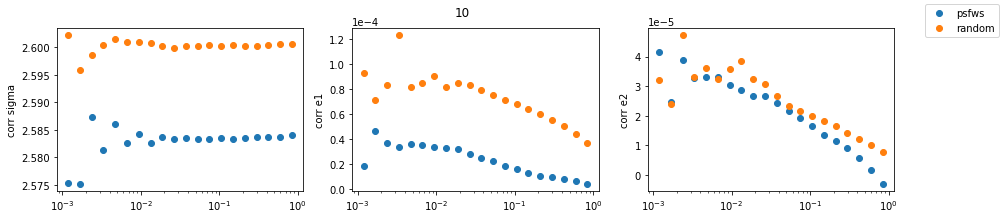

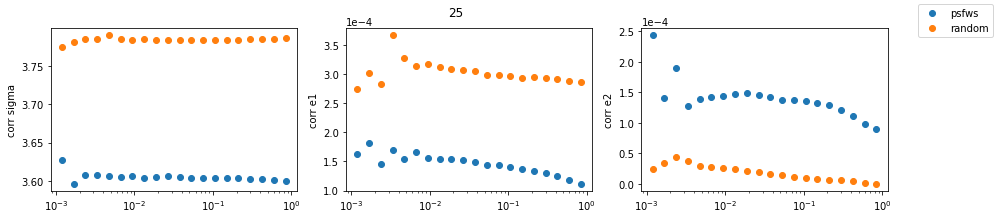

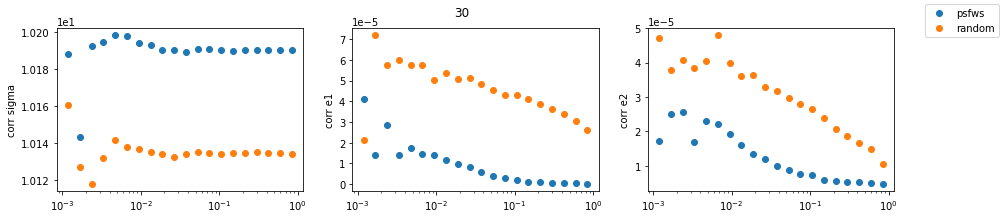

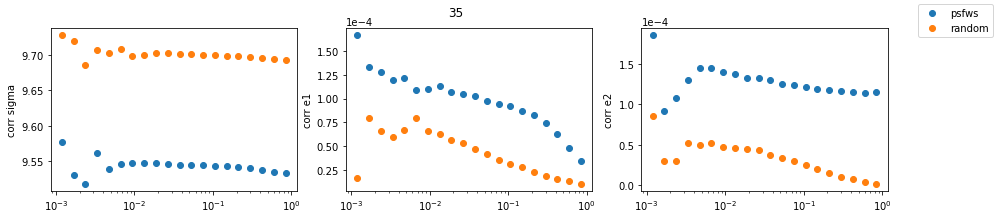

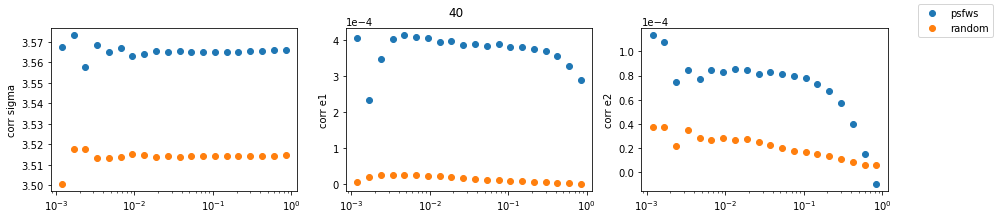

In [107]:
for i in ([6, 7, 8, 9,10, 22, 23, 25, 26, 27]+list(range(30,41))):
    fig, ax = plt.subplots(1,3,figsize=(15,3))
    
    ax[0].scatter(rsP,xi_sP[i],label="psfws")
    ax[0].scatter(rsR,xi_sR[i], label="random")
    ax[0].set_ylabel("corr sigma")
    
    ax[1].scatter(rsP,xi_e1P[i])
    ax[1].scatter(rsR,xi_e1R[i])
    ax[1].set_ylabel("corr e1")
    
    ax[2].scatter(rsP,xi_e2P[i])
    ax[2].scatter(rsR,xi_e2R[i])
    ax[2].set_ylabel("corr e2")
    
    
    [a.ticklabel_format(style="sci", scilimits=(0,0)) for a in ax]
    [a.set_xscale('log') for a in ax]
    
    #[a.set_yscale('log') for a in ax]
    #[a.set_ylim(ymin=0) for a in ax]

    fig.suptitle(str(i))
    fig.legend()
    
    if i%5 != 0:
        plt.close()
    

# median corr vs. median speed

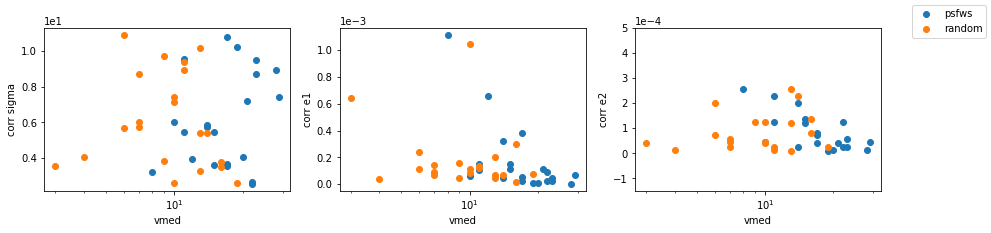

In [182]:
vmedP = df["vmed psfws"]
vmedR = df["vmed rand"]

fig, ax = plt.subplots(1,3,figsize=(15,3))
ax[0].scatter(vmedP, p["xi sigma"],label="psfws")
ax[0].scatter(vmedR, r["xi sigma"], label="random")
ax[0].set_ylabel("corr sigma")

ax[1].scatter(vmedP, p["xi e1"])
ax[1].scatter(vmedR, r["xi e1"])
ax[1].set_ylabel("corr e1")

ax[2].scatter(vmedP, p["xi e2"])
ax[2].scatter(vmedR, p["xi e2"])
ax[2].set_ylabel("corr e2")
ax[2].set_ylim(ymax=0.5e-3)


[a.ticklabel_format(style="sci", scilimits=(0,0)) for a in ax]
[a.set_xscale('log') for a in ax]
[a.set_xlabel("vmed") for a in ax]

fig.legend()



# med corr vs. max speed

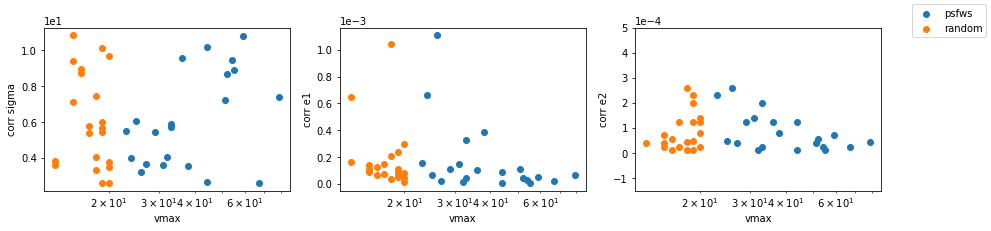

In [183]:
vmaxP = df["vmax psfws"]
vmaxR = df["vmax rand"]

fig, ax = plt.subplots(1,3,figsize=(15,3))
ax[0].scatter(vmaxP, p["xi sigma"],label="psfws")
ax[0].scatter(vmaxR, r["xi sigma"], label="random")
ax[0].set_ylabel("corr sigma")

ax[1].scatter(vmaxP, p["xi e1"])
ax[1].scatter(vmaxR, r["xi e1"])
ax[1].set_ylabel("corr e1")

ax[2].scatter(vmaxP, p["xi e2"])
ax[2].scatter(vmaxR, p["xi e2"])
ax[2].set_ylabel("corr e2")
ax[2].set_ylim(ymax=0.5e-3)


[a.ticklabel_format(style="sci", scilimits=(0,0)) for a in ax]
[a.set_xscale('log') for a in ax]
[a.set_xlabel("vmax") for a in ax]

fig.legend()



# med corr v. ground wind

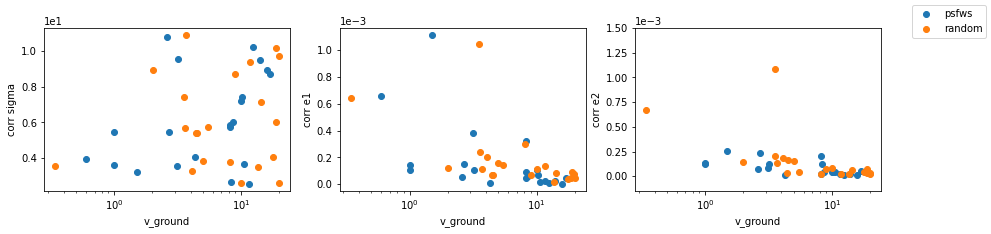

In [184]:
grdwindP = [spdP[i][0] for i in spdP]
grdwindR = [spdR[i][0] for i in spdR]

fig, ax = plt.subplots(1,3,figsize=(15,3))
ax[0].scatter(grdwindP,p["xi sigma"],label="psfws")
ax[0].scatter(grdwindR,r["xi sigma"], label="random")
ax[0].set_ylabel("corr sigma")

ax[1].scatter(grdwindP,p["xi e1"])
ax[1].scatter(grdwindR,r["xi e1"])
ax[1].set_ylabel("corr e1")

ax[2].scatter(grdwindP,p["xi e2"])
ax[2].scatter(grdwindR,r["xi e2"])
ax[2].set_ylabel("corr e2")
ax[2].set_ylim(ymax=1.5e-3)


[a.ticklabel_format(style="sci", scilimits=(0,0)) for a in ax]
[a.set_xscale('log') for a in ax]
[a.set_xlabel("v_ground") for a in ax]

fig.legend()

    